## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  89.719751   265.999232  0.548784   6.456254  1.116898
1  99.183177   443.703225  0.346751  10.510684  1.032090
2  24.530341  1437.609488  0.461933   5.252241  1.669012
3  93.890082  1592.684972  0.391184   6.014005  1.462901
4  74.871461   961.878447  0.699470   1.218541  1.652424


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9928485	total: 56.1ms	remaining: 56.1s
1:	learn: 0.9828509	total: 57.5ms	remaining: 28.7s
2:	learn: 0.9695158	total: 58.2ms	remaining: 19.4s
3:	learn: 0.9594199	total: 58.9ms	remaining: 14.7s
4:	learn: 0.9475132	total: 59.4ms	remaining: 11.8s
5:	learn: 0.9377148	total: 59.9ms	remaining: 9.93s
6:	learn: 0.9268655	total: 60.4ms	remaining: 8.56s
7:	learn: 0.9161566	total: 60.7ms	remaining: 7.53s
8:	learn: 0.9068086	total: 61.1ms	remaining: 6.72s
9:	learn: 0.8970577	total: 61.4ms	remaining: 6.07s
10:	learn: 0.8867897	total: 61.7ms	remaining: 5.55s
11:	learn: 0.8759780	total: 62ms	remaining: 5.11s
12:	learn: 0.8678881	total: 62.3ms	remaining: 4.73s
13:	learn: 0.8589207	total: 62.7ms	remaining: 4.41s
14:	learn: 0.8500842	total: 63ms	remaining: 4.14s
15:	learn: 0.8418293	total: 63.3ms	remaining: 3.89s
16:	learn: 0.8330728	total: 63.7ms	remaining: 3.68s
17:	learn: 0.8247018	total: 64ms	remaining: 3.49s
18:	learn: 0.8168102	total: 64.3ms	remaining: 3.32

86:	learn: 0.4389206	total: 98ms	remaining: 1.03s
87:	learn: 0.4356179	total: 98.6ms	remaining: 1.02s
88:	learn: 0.4322256	total: 99.3ms	remaining: 1.02s
89:	learn: 0.4290088	total: 99.8ms	remaining: 1.01s
90:	learn: 0.4254051	total: 100ms	remaining: 1s
91:	learn: 0.4225029	total: 101ms	remaining: 993ms
92:	learn: 0.4192269	total: 101ms	remaining: 990ms
93:	learn: 0.4164189	total: 102ms	remaining: 987ms
94:	learn: 0.4132595	total: 104ms	remaining: 990ms
95:	learn: 0.4104460	total: 104ms	remaining: 984ms
96:	learn: 0.4074207	total: 105ms	remaining: 980ms
97:	learn: 0.4045288	total: 106ms	remaining: 976ms
98:	learn: 0.4017311	total: 107ms	remaining: 971ms
99:	learn: 0.3985348	total: 107ms	remaining: 964ms
100:	learn: 0.3959858	total: 108ms	remaining: 957ms
101:	learn: 0.3928401	total: 108ms	remaining: 950ms
102:	learn: 0.3899417	total: 108ms	remaining: 942ms
103:	learn: 0.3876367	total: 109ms	remaining: 937ms
104:	learn: 0.3850182	total: 109ms	remaining: 930ms
105:	learn: 0.3823150	total

256:	learn: 0.1882683	total: 184ms	remaining: 531ms
257:	learn: 0.1879831	total: 184ms	remaining: 530ms
258:	learn: 0.1872126	total: 185ms	remaining: 528ms
259:	learn: 0.1869014	total: 185ms	remaining: 527ms
260:	learn: 0.1866129	total: 185ms	remaining: 525ms
261:	learn: 0.1860182	total: 186ms	remaining: 524ms
262:	learn: 0.1855323	total: 186ms	remaining: 522ms
263:	learn: 0.1847069	total: 187ms	remaining: 521ms
264:	learn: 0.1839498	total: 187ms	remaining: 519ms
265:	learn: 0.1836631	total: 188ms	remaining: 518ms
266:	learn: 0.1830432	total: 188ms	remaining: 516ms
267:	learn: 0.1824577	total: 188ms	remaining: 515ms
268:	learn: 0.1821850	total: 189ms	remaining: 513ms
269:	learn: 0.1813363	total: 190ms	remaining: 512ms
270:	learn: 0.1810364	total: 190ms	remaining: 512ms
271:	learn: 0.1806749	total: 191ms	remaining: 511ms
272:	learn: 0.1804517	total: 191ms	remaining: 510ms
273:	learn: 0.1797467	total: 192ms	remaining: 509ms
274:	learn: 0.1788538	total: 193ms	remaining: 508ms
275:	learn: 

468:	learn: 0.1003112	total: 277ms	remaining: 314ms
469:	learn: 0.0999198	total: 278ms	remaining: 313ms
470:	learn: 0.0996868	total: 278ms	remaining: 312ms
471:	learn: 0.0993820	total: 278ms	remaining: 311ms
472:	learn: 0.0991816	total: 279ms	remaining: 311ms
473:	learn: 0.0988009	total: 279ms	remaining: 310ms
474:	learn: 0.0985284	total: 280ms	remaining: 309ms
475:	learn: 0.0981972	total: 280ms	remaining: 308ms
476:	learn: 0.0979457	total: 281ms	remaining: 308ms
477:	learn: 0.0976650	total: 281ms	remaining: 307ms
478:	learn: 0.0974225	total: 282ms	remaining: 306ms
479:	learn: 0.0970854	total: 282ms	remaining: 306ms
480:	learn: 0.0968606	total: 283ms	remaining: 305ms
481:	learn: 0.0965410	total: 283ms	remaining: 304ms
482:	learn: 0.0963073	total: 284ms	remaining: 304ms
483:	learn: 0.0959924	total: 284ms	remaining: 303ms
484:	learn: 0.0957548	total: 285ms	remaining: 302ms
485:	learn: 0.0954473	total: 285ms	remaining: 302ms
486:	learn: 0.0952288	total: 286ms	remaining: 301ms
487:	learn: 

654:	learn: 0.0623567	total: 361ms	remaining: 190ms
655:	learn: 0.0622415	total: 362ms	remaining: 190ms
656:	learn: 0.0622053	total: 362ms	remaining: 189ms
657:	learn: 0.0620252	total: 363ms	remaining: 189ms
658:	learn: 0.0618419	total: 363ms	remaining: 188ms
659:	learn: 0.0617123	total: 364ms	remaining: 187ms
660:	learn: 0.0615902	total: 364ms	remaining: 187ms
661:	learn: 0.0614554	total: 364ms	remaining: 186ms
662:	learn: 0.0613669	total: 365ms	remaining: 185ms
663:	learn: 0.0613315	total: 365ms	remaining: 185ms
664:	learn: 0.0612442	total: 366ms	remaining: 184ms
665:	learn: 0.0612092	total: 366ms	remaining: 184ms
666:	learn: 0.0609814	total: 367ms	remaining: 183ms
667:	learn: 0.0609472	total: 367ms	remaining: 182ms
668:	learn: 0.0608342	total: 367ms	remaining: 182ms
669:	learn: 0.0605891	total: 368ms	remaining: 181ms
670:	learn: 0.0604320	total: 369ms	remaining: 181ms
671:	learn: 0.0602769	total: 369ms	remaining: 180ms
672:	learn: 0.0601846	total: 370ms	remaining: 180ms
673:	learn: 

859:	learn: 0.0375711	total: 455ms	remaining: 74ms
860:	learn: 0.0374073	total: 455ms	remaining: 73.5ms
861:	learn: 0.0372707	total: 456ms	remaining: 73ms
862:	learn: 0.0371697	total: 456ms	remaining: 72.4ms
863:	learn: 0.0370880	total: 456ms	remaining: 71.8ms
864:	learn: 0.0369836	total: 457ms	remaining: 71.3ms
865:	learn: 0.0368502	total: 458ms	remaining: 70.8ms
866:	learn: 0.0367883	total: 458ms	remaining: 70.3ms
867:	learn: 0.0365922	total: 459ms	remaining: 69.7ms
868:	learn: 0.0365309	total: 459ms	remaining: 69.2ms
869:	learn: 0.0363620	total: 459ms	remaining: 68.6ms
870:	learn: 0.0362826	total: 460ms	remaining: 68.1ms
871:	learn: 0.0362017	total: 460ms	remaining: 67.5ms
872:	learn: 0.0360444	total: 461ms	remaining: 67ms
873:	learn: 0.0359149	total: 461ms	remaining: 66.5ms
874:	learn: 0.0357876	total: 461ms	remaining: 65.9ms
875:	learn: 0.0357087	total: 462ms	remaining: 65.4ms
876:	learn: 0.0356313	total: 462ms	remaining: 64.8ms
877:	learn: 0.0355608	total: 463ms	remaining: 64.3ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

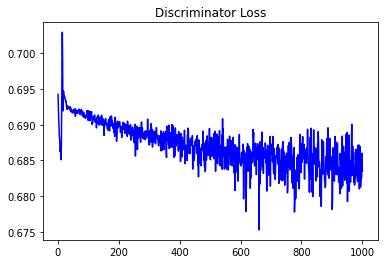

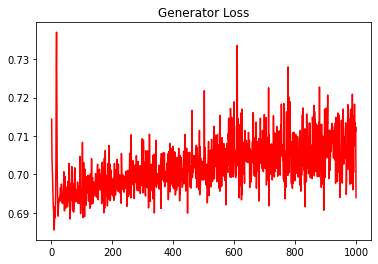

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.5082210563516858


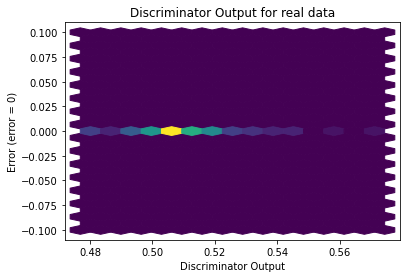

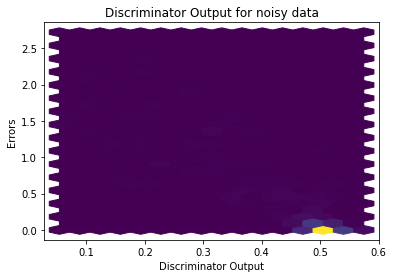

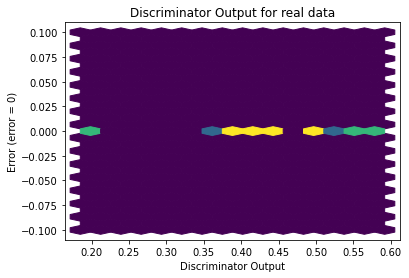

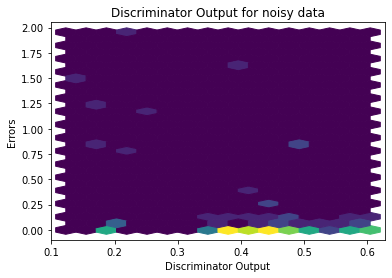

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


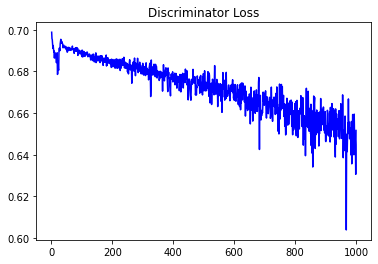

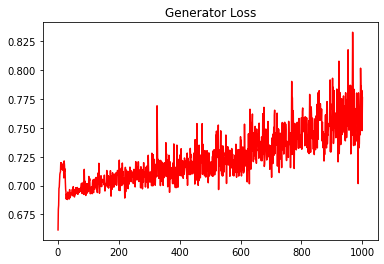

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.48369427910994217


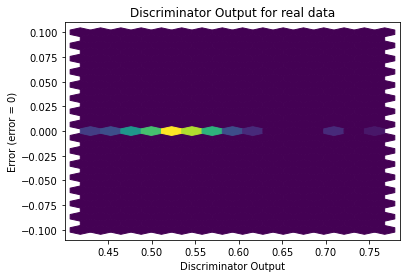

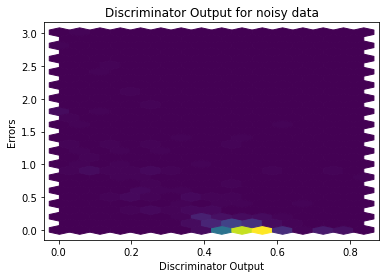

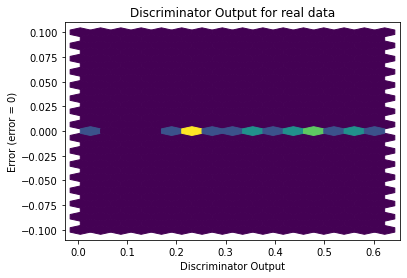

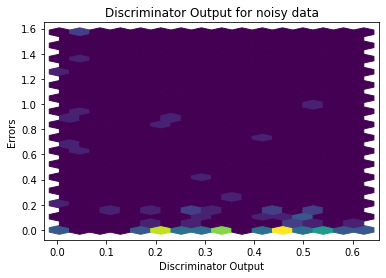

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1524]], requires_grad=True)
